## Part 0.5: import Neccessary Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy import stats

## Part 1: Data Cleaning and Preprocessing

### 1.1: Load and Inspect the Dataset

In [2]:
df = pd.read_csv('Building_Energy_Benchmarking.csv')
df.head(5)

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,26,1.5,1152308,506,6582,NaN,1152308.0,536.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,253,118.1,508594,4926,NaN,NaN,508594.0,236.0,2023,2023-21988603


##### Load the dataset and display its shape, column names, and data types.

In [3]:
print(df.shape)
print(df.columns)
print(df.info())

(494, 31)
Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emiss

#### Identify and list the number of missing values in each column.

In [4]:
print(df.isna().sum())

Property Id                                                                0
Property Name                                                              0
Address 1                                                                  0
City                                                                       0
Postal Code                                                                0
Province                                                                   0
Primary Property Type - Self Selected                                      0
Number of Buildings                                                        0
Year Built                                                                 0
Property GFA - Self-Reported (m²)                                          0
ENERGY STAR Score                                                        329
Site Energy Use (GJ)                                                       0
Weather Normalized Site Energy Use (GJ)                                    0

### 1.2 Handling Missing Data

#### Drop columns with more than 40% missing values.

In [5]:
print((df.isna().sum()/len(df))*100)

Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                         0.000000
ENERGY STAR Score                                                        66.599190
Site Energy Use (GJ)                                                      0.000000
Weat

In [6]:
# As can be seen above, the column "ENERGY STAR Score" has significant number of missing values,
# however, since we need this column for the t-test, I will not drop it

df = df.drop(columns=['District Hot Water Use (GJ)','Electricity Use – Generated from Onsite Renewable Systems (kWh)',
         'Green Power - Onsite and Offsite (kWh)','Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)'],axis=1)

df.head(3)

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,4.47,4.91,509,276.7,280,152.4,368616,5453,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,1.57,1.64,920,118.4,243,31.2,1091854,4725,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0.94,1.00,499,74.6,0,0.0,508589,3,2023,2023-6305956


In [7]:
df.isna().sum()

Property Id                                     0
Property Name                                   0
Address 1                                       0
City                                            0
Postal Code                                     0
Province                                        0
Primary Property Type - Self Selected           0
Number of Buildings                             0
Year Built                                      0
Property GFA - Self-Reported (m²)               0
ENERGY STAR Score                             329
Site Energy Use (GJ)                            0
Weather Normalized Site Energy Use (GJ)         0
Site EUI (GJ/m²)                                0
Weather Normalized Site EUI (GJ/m²)             0
Source Energy Use (GJ)                          0
Weather Normalized Source Energy Use (GJ)       2
Source EUI (GJ/m²)                              0
Weather Normalized Source EUI (GJ/m²)           0
Total GHG Emissions (Metric Tons CO2e)          0


#### For numerical columns, fill missing values with the median of their respective column.
#### For categorical columns, fill missing values with the mode of their respective column.

In [34]:
df['Weather Normalized Source Energy Use (GJ)'] = df['Weather Normalized Source Energy Use (GJ)'].astype(str).str.replace(',', '').astype('float') # to remove comma from number like 11,234.5
df['Weather Normalized Source Energy Use (GJ)'] = df['Weather Normalized Source Energy Use (GJ)'].fillna(df['Weather Normalized Source Energy Use (GJ)'].median())
df['Natural Gas Use (GJ)'] = df['Natural Gas Use (GJ)'].astype(str).str.replace(',', '').astype('float')
df['Natural Gas Use (GJ)'] = df['Natural Gas Use (GJ)'].fillna(df['Natural Gas Use (GJ)'].median())

df['ENERGY STAR Score'] = df['ENERGY STAR Score'].fillna(df['ENERGY STAR Score'].median())

#df.isna().sum()


#### 1.3 Extracting and Cleaning Data Using Regex
**Extract numeric values from text-based numeric columns (e.g., Property GFA,
Energy Use, Emissions).**

In [9]:
#df['Address 1_nums']=df['Address 1'].str.extract(r'(\d+\.?\d*)')[0]
for col in df.select_dtypes(include = ['object']).columns:
    df[col+'_num'] = df[col].str.extract(r'(\d+\.?\d*)')[0]
    
    
df.head(3)


,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Province_num,Primary Property Type - Self Selected_num,Property GFA - Self-Reported (m²)_num,Site Energy Use (GJ)_num,Weather Normalized Site Energy Use (GJ)_num,Source Energy Use (GJ)_num,Total GHG Emissions (Metric Tons CO2e)_num,Direct GHG Emissions (Metric Tons CO2e)_num,Electricity Use - Grid Purchase (kWh)_num,Unique ID_num
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,NaN,NaN,1838,6780,7554,8209,509,280,368616,2023
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,NaN,NaN,7770,8656,9266,12202,920,243,1091854,2023
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,NaN,NaN,6681,4014,4364,6254,499,0,508589,2023


**Standardize Postal Codes to follow the Canadian format (A1A 1A1).**

In [10]:
df['Postal Code'] = df['Postal Code'].str.upper().str.replace(r'(\w\d\w)\s?(\d\w\d)',
                                                              r'\1 \2', # Ensures a single space between the two parts.
                                                             regex=True)

df.head(5)

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Province_num,Primary Property Type - Self Selected_num,Property GFA - Self-Reported (m²)_num,Site Energy Use (GJ)_num,Weather Normalized Site Energy Use (GJ)_num,Source Energy Use (GJ)_num,Total GHG Emissions (Metric Tons CO2e)_num,Direct GHG Emissions (Metric Tons CO2e)_num,Electricity Use - Grid Purchase (kWh)_num,Unique ID_num
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,NaN,NaN,1838,6780,7554,8209,509,280,368616,2023
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,T2E 7L7,Alberta,Office,1,1981,7770,...,NaN,NaN,7770,8656,9266,12202,920,243,1091854,2023
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,NaN,NaN,6681,4014,4364,6254,499,0,508589,2023
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G 0G2,Alberta,Office,1,1979,17468,...,NaN,NaN,17468,11237,12229,16882,1293,26,1152308,2023
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,NaN,NaN,2143,6757,7366,8572,568,253,508594,2023


**Clean and extract meaningful text from Property Names and Addresses.**

I am not sure, what I need to deliver here!!!! So, I will do anything I know step by step.

In [11]:
# step 1. convert both Property Names and Addresses to title case

df['Address 1'] = df['Address 1'].str.title()
df['Property Name'] = df['Property Name'].str.title()

# df[['Property Name','Address 1']]

In [12]:
# step 2. Removing Special Characters and Unnecessary Text

df['Property Name'] = df['Property Name'].str.replace(r'[^\w\s]', '', regex=True)
df['Address 1'] = df['Address 1'].str.replace(r'[^\w\s]' , '' , regex = True)

# df[['Property Name','Address 1']]

In [13]:
# step 3. Normalize Abbreviations:

df['Address 1'] = df['Address 1'].replace({
    'St': 'Street',
    'Av': 'Avenue',
    'Blvd': 'Boulevard',
    'Bv': 'Boulevard',
    'Dr': 'Drive',
    'Se': 'South East',
    'Ne': 'North East',
    'Sw': 'South West',
    'Nw': 'North West'
}, regex=True)

# I hope, I haven't missed any other Abbreviations

# df[['Property Name','Address 1']]

In [14]:
# step 4. extract Address Elements

df['Street Number'] = df['Address 1'].str.extract(r'(\d+)')
df['Street Name'] = df['Address 1'].str.extract(r'(\D+)(\s[A-Za-z]+)$')[0]
df['Street Direction'] = df['Address 1'].str.extract(r'(\s[A-Za-z]+)$')[0]

# df.head(10)

In [15]:
# step 5. remove any extra spaces

df['Property Name'] = df['Property Name'].str.strip()
df['Address 1'] = df['Address 1'].str.strip()

df.head(5)

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Site Energy Use (GJ)_num,Weather Normalized Site Energy Use (GJ)_num,Source Energy Use (GJ)_num,Total GHG Emissions (Metric Tons CO2e)_num,Direct GHG Emissions (Metric Tons CO2e)_num,Electricity Use - Grid Purchase (kWh)_num,Unique ID_num,Street Number,Street Name,Street Direction
0,10176804,Acadia Aquatic Fitness Centre,9009 Fairmount Drive South East,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,6780,7554,8209,509,280,368616,2023,9009,Fairmount Drive South,East
1,6169481,Ad Valorem,2924 11 Street North East,Calgary,T2E 7L7,Alberta,Office,1,1981,7770,...,8656,9266,12202,920,243,1091854,2023,2924,Street North,East
2,6305956,Alberta Trade Centre,315 10 Avenue South East,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,4014,4364,6254,499,0,508589,2023,315,Avenue South,East
3,8854296,Andrew Davison,133 6 Avenue South East,Calgary,T2G 0G2,Alberta,Office,1,1979,17468,...,11237,12229,16882,1293,26,1152308,2023,133,Avenue South,East
4,21988603,Animal Services Centre,2201 Portland Street South East,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,6757,7366,8572,568,253,508594,2023,2201,Portland Street South,East


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Property Id                                  494 non-null    int64  
 1   Property Name                                494 non-null    object 
 2   Address 1                                    494 non-null    object 
 3   City                                         494 non-null    object 
 4   Postal Code                                  494 non-null    object 
 5   Province                                     494 non-null    object 
 6   Primary Property Type - Self Selected        494 non-null    object 
 7   Number of Buildings                          494 non-null    int64  
 8   Year Built                                   494 non-null    int64  
 9   Property GFA - Self-Reported (m²)            494 non-null    object 
 10  EN

In [17]:
# Ensure extracted values are properly converted to numerical types for analysis.
df['Street Number'] = df['Street Number'].astype('int')

## Part 2: Exploratory Data Analysis (EDA) and Aggregations

#### 2.1 Statistical Summary

**Generate summary statistics for numerical features using extracted data.**

In [18]:
df.describe()

,Property Id,Number of Buildings,Year Built,ENERGY STAR Score,Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions Intensity (kgCO2e/m²),Natural Gas Use (GJ),Year Ending,Street Number
count,4.940000e+02,494.000000,494.000000,165.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,1.308877e+07,1.060729,1980.091093,44.836364,1.774798,1.810324,10221.438866,2.282753,2.319717,158.671660,63.821862,5520.693522,2020.995951,3213.795547
std,5.659556e+06,0.278281,25.159568,30.244187,1.306700,1.331529,22866.650000,1.597846,1.622897,109.472637,56.835735,17218.457051,1.414208,3043.975918
min,6.169481e+06,1.000000,1896.000000,1.000000,0.060000,0.060000,146.000000,0.110000,0.110000,10.200000,0.000000,3.000000,2019.000000,6.000000
25%,9.563763e+06,1.000000,1970.000000,17.000000,0.990000,1.000000,1562.825000,1.312500,1.350000,93.100000,33.325000,861.050000,2020.000000,800.000000
50%,9.997794e+06,1.000000,1978.000000,46.000000,1.290000,1.310000,3144.800000,1.680000,1.690000,117.600000,43.900000,1569.750000,2021.000000,2511.000000
75%,2.198860e+07,1.000000,1996.000000,76.000000,2.065000,2.110000,9637.275000,2.622500,2.652500,186.975000,74.050000,4816.200000,2022.000000,4824.000000
max,2.198863e+07,3.000000,2018.000000,94.000000,8.430000,8.360000,260399.000000,10.130000,10.060000,666.200000,386.000000,238415.000000,2023.000000,13807.000000


**Identify and explain key observations (e.g., outliers, mean vs. median differences).**

According to obtained data, the average year that the buildings were built was around **1980** and **1981**, with the oldest building, built in1896. 
Regarding the site EUI, the average energy use intensity for all the building types was around 

#### 2.2 Aggregations

**Compute the average Energy Use Intensity (EUI) by Property Type.**

In [19]:
df['Weather Normalized Source EUI (GJ/m²)'] = df['Weather Normalized Source EUI (GJ/m²)'].astype('int')

df.groupby(['Primary Property Type - Self Selected']).agg(
avg_EUI_prop_type = ('Weather Normalized Source EUI (GJ/m²)','mean')).reset_index()

,Primary Property Type - Self Selected,avg_EUI_prop_type
0,Distribution Center,2.800000
1,Fire Station,1.122905
2,Fitness Center/Health Club/Gym,4.900000
3,Heated Swimming Pool,5.533333
4,Ice/Curling Rink,2.440000
5,Indoor Arena,1.000000
6,Mixed Use Property,0.000000
7,Museum,2.000000
8,Non-Refrigerated Warehouse,0.533333
9,Office,1.709091


**Compute the total Greenhouse Gas (GHG) emissions by year.**

In [20]:
df['Start Till End'] = df['Year Ending']-df['Year Built']
# df.head(5)

df['Total GHG Emissions (Metric Tons CO2e)'] = df['Total GHG Emissions (Metric Tons CO2e)'].astype('str').str.replace(',','').astype('float')
df['total Greenhouse Gas (GHG) emissions by year'] = df['Total GHG Emissions (Metric Tons CO2e)']/df['Start Till End']

#df[['Primary Property Type - Self Selected','total Greenhouse Gas (GHG) emissions by year']]

df.groupby('Primary Property Type - Self Selected').agg(
    GHG_emission_by_year_for_property_type = ('total Greenhouse Gas (GHG) emissions by year','sum')
    ).reset_index()

,Primary Property Type - Self Selected,GHG_emission_by_year_for_property_type
0,Distribution Center,14959.000000
1,Fire Station,2318.337461
2,Fitness Center/Health Club/Gym,1150.278165
3,Heated Swimming Pool,356.365065
4,Ice/Curling Rink,1189.876275
5,Indoor Arena,237.132544
6,Mixed Use Property,4.781266
7,Museum,168.901786
8,Non-Refrigerated Warehouse,409.711089
9,Office,5792.165632


**Identify the top 5 properties with the highest total energy consumption.**

In [21]:
df['Site Energy Use (GJ)'] = df['Site Energy Use (GJ)'].astype(str).str.replace(',', '').astype('float')

df.groupby(['Primary Property Type - Self Selected']).agg(
sum_EUI_prop_type = ('Site Energy Use (GJ)','sum')).reset_index().sort_values(by = ['sum_EUI_prop_type'], ascending=False).head(5)

,Primary Property Type - Self Selected,sum_EUI_prop_type
9,Office,1015336.9
2,Fitness Center/Health Club/Gym,889770.6
0,Distribution Center,726554.8
4,Ice/Curling Rink,567891.7
1,Fire Station,306095.3


#### 2.3 Detecting Outliers Using Regex and IQR

**Identify values that do not conform to expected numeric formats.**

In [22]:
pattern = r'[^0-9.,]'


df['Invalid Format'] = df['Total GHG Emissions (Metric Tons CO2e)'].apply(lambda x: bool(re.search(pattern, str(x))))
invalid_values = df[df['Invalid Format']]

print("Invalid Numeric Values:")
display(invalid_values)

Invalid Numeric Values:


,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Total GHG Emissions (Metric Tons CO2e)_num,Direct GHG Emissions (Metric Tons CO2e)_num,Electricity Use - Grid Purchase (kWh)_num,Unique ID_num,Street Number,Street Name,Street Direction,Start Till End,total Greenhouse Gas (GHG) emissions by year,Invalid Format


**Remove or correct incorrectly formatted numeric values.**

In [23]:
def clean_numbers(x):
    x=str(x).strip()  # this will remove the spaces
    x = re.sub(r'[^0-9.]','',x)   # this will remove non-numeric characters
    
    if x.count('.')>1:
        parts = x.split('.')
        x = parts[0] + '.' + ''.join(parts[1:]) #keep only the first decimal
        
    return float(x) if x else None

df['Cleaned Total GHG Emissions (Metric Tons CO2e)'] = df['Total GHG Emissions (Metric Tons CO2e)'].apply(clean_numbers)
display(df[['Cleaned Total GHG Emissions (Metric Tons CO2e)', 'Total GHG Emissions (Metric Tons CO2e)']])

,Cleaned Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions (Metric Tons CO2e)
0,509.0,509.0
1,920.0,920.0
2,499.0,499.0
3,1293.0,1293.0
4,568.0,568.0
...,...,...
489,66.0,66.0
490,105.0,105.0
491,53.0,53.0
492,105.0,105.0


**Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions (Metric Tons CO2e).**

In [24]:
Q1 = df['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
Q3 = df['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Total GHG Emissions (Metric Tons CO2e)'] < lower_bound )
             | (df['Total GHG Emissions (Metric Tons CO2e)'] > upper_bound)]

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers: {outliers.shape[0]}")

Q1: 113.85
Q3: 696.55
IQR: 582.6999999999999
Lower Bound: -760.1999999999999
Upper Bound: 1570.6
Number of outliers: 46


**Replace outliers with the median value for that property type.**

In [25]:
outliers_GHG = (df['Total GHG Emissions (Metric Tons CO2e)'] < lower_bound )| (df['Total GHG Emissions (Metric Tons CO2e)'] > upper_bound)

prop_type_median = df.groupby('Primary Property Type - Self Selected')['Total GHG Emissions (Metric Tons CO2e)'].transform('median')

df.loc[outliers_GHG,'Total GHG Emissions (Metric Tons CO2e)'] = prop_type_median[outliers_GHG]

display(df.head(3))

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e)_num,Electricity Use - Grid Purchase (kWh)_num,Unique ID_num,Street Number,Street Name,Street Direction,Start Till End,total Greenhouse Gas (GHG) emissions by year,Invalid Format,Cleaned Total GHG Emissions (Metric Tons CO2e)
0,10176804,Acadia Aquatic Fitness Centre,9009 Fairmount Drive South East,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,368616,2023,9009,Fairmount Drive South,East,13,39.153846,False,509.0
1,6169481,Ad Valorem,2924 11 Street North East,Calgary,T2E 7L7,Alberta,Office,1,1981,7770,...,243,1091854,2023,2924,Street North,East,42,21.904762,False,920.0
2,6305956,Alberta Trade Centre,315 10 Avenue South East,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,508589,2023,315,Avenue South,East,49,10.183673,False,499.0


## Part 3: Data Visualization

#### 3.1 Time-Series Visualization
**Plot the yearly trend of average Site Energy Use Intensity (EUI).**

**Highlight any significant increases or decreases in energy usage.**

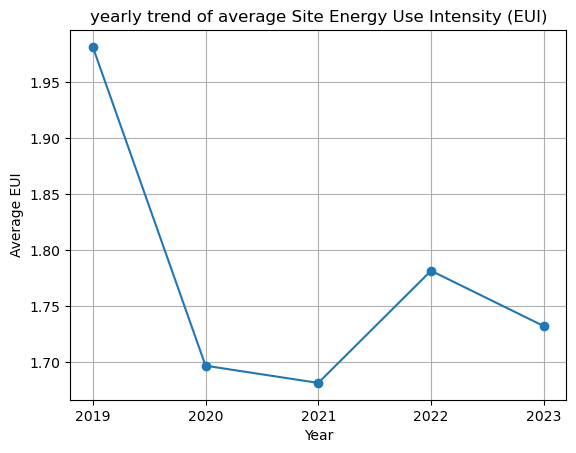

In [26]:
average_EUI = df.groupby(['Year Ending']).agg(
    avg_EUI = ('Site EUI (GJ/m²)','mean')
).reset_index()

#average_EUI

plt.plot(average_EUI['Year Ending'],average_EUI['avg_EUI'],marker='o')
plt.xticks(np.arange(average_EUI['Year Ending'].min(), average_EUI['Year Ending'].max() + 1, 1))
plt.title('yearly trend of average Site Energy Use Intensity (EUI)')
plt.xlabel('Year')
plt.ylabel('Average EUI')
plt.grid()
plt.show()

According to the graph, there is a significant decline in average EUI between the years 2019 and 2020, which becomes somewhat steady after 2020 with low fluctuation.

#### 3.2 Comparative Bar Charts

**Create a bar chart showing the top 10 buildings with the highest GHG emissions.**

**Annotate the bar chart with emission values.**

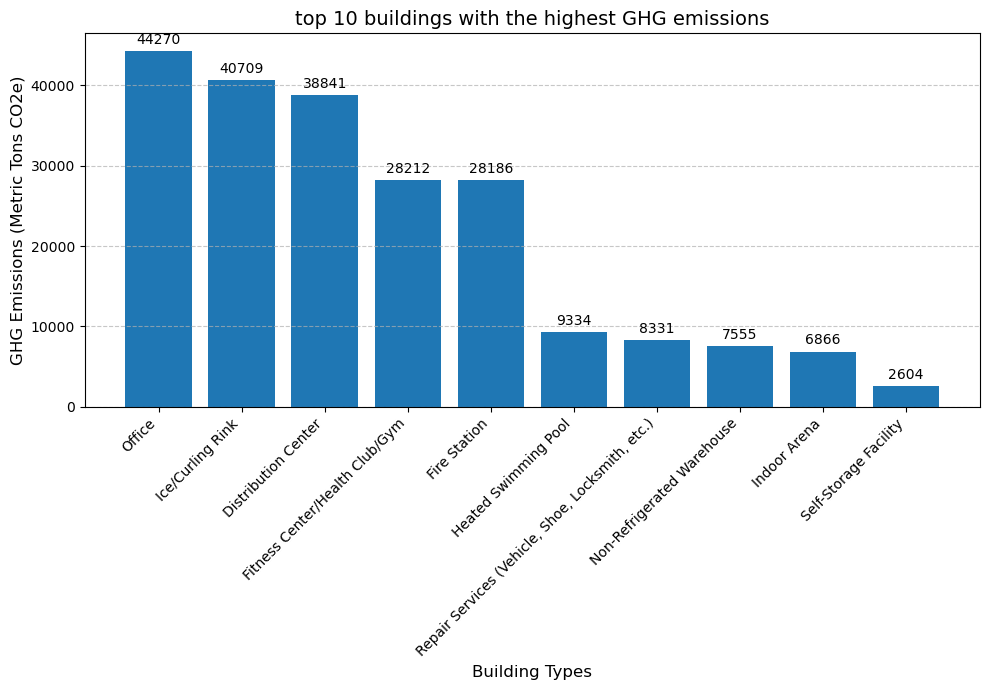

In [27]:
df['Total GHG Emissions (Metric Tons CO2e)'] = df['Total GHG Emissions (Metric Tons CO2e)'].astype(str).str.replace(',', '').astype('float')

top_GHG_prop = df.groupby(['Primary Property Type - Self Selected']).agg(
sum_EUI_prop_type = ('Total GHG Emissions (Metric Tons CO2e)','sum')).reset_index().sort_values(by = ['sum_EUI_prop_type'], ascending=False).head(10)

#top_GHG_prop

plt.figure(figsize = (10,7))
bars = plt.bar(x=top_GHG_prop['Primary Property Type - Self Selected'],height=top_GHG_prop['sum_EUI_prop_type'])
plt.bar_label(bars,fmt='%.0f',padding=3,fontsize=10)

plt.title('top 10 buildings with the highest GHG emissions', fontsize=14)
plt.xlabel('Building Types', fontsize=12)
plt.ylabel('GHG Emissions (Metric Tons CO2e)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 3.3 Heatmap Visualization

**Create a heatmap of energy usage intensity (Site EUI (GJ/m²)) across different property types.**

In [28]:
heatmap_data = df.groupby(['Primary Property Type - Self Selected','Year Ending']).agg(
    avg_EUI = ('Site EUI (GJ/m²)','sum')).reset_index()
# heatmap_data

heatmap_pivot = heatmap_data.pivot(index = 'Primary Property Type - Self Selected', columns = 'Year Ending', values = 'avg_EUI')
heatmap_pivot

Year Ending,2019,2020,2021,2022,2023
Primary Property Type - Self Selected,,,,,
Distribution Center,1.68,2.30,3.32,3.63,5.50
Fire Station,46.91,44.77,43.56,43.52,37.62
Fitness Center/Health Club/Gym,43.01,30.47,31.40,34.74,35.78
Heated Swimming Pool,16.89,12.70,12.96,14.44,15.09
Ice/Curling Rink,24.02,20.37,18.76,23.00,22.96
Indoor Arena,1.39,1.16,0.97,1.01,1.00
Mixed Use Property,0.56,0.33,0.52,0.48,0.40
Museum,1.70,1.61,1.46,1.60,1.55
Non-Refrigerated Warehouse,2.50,2.23,2.32,2.33,2.14


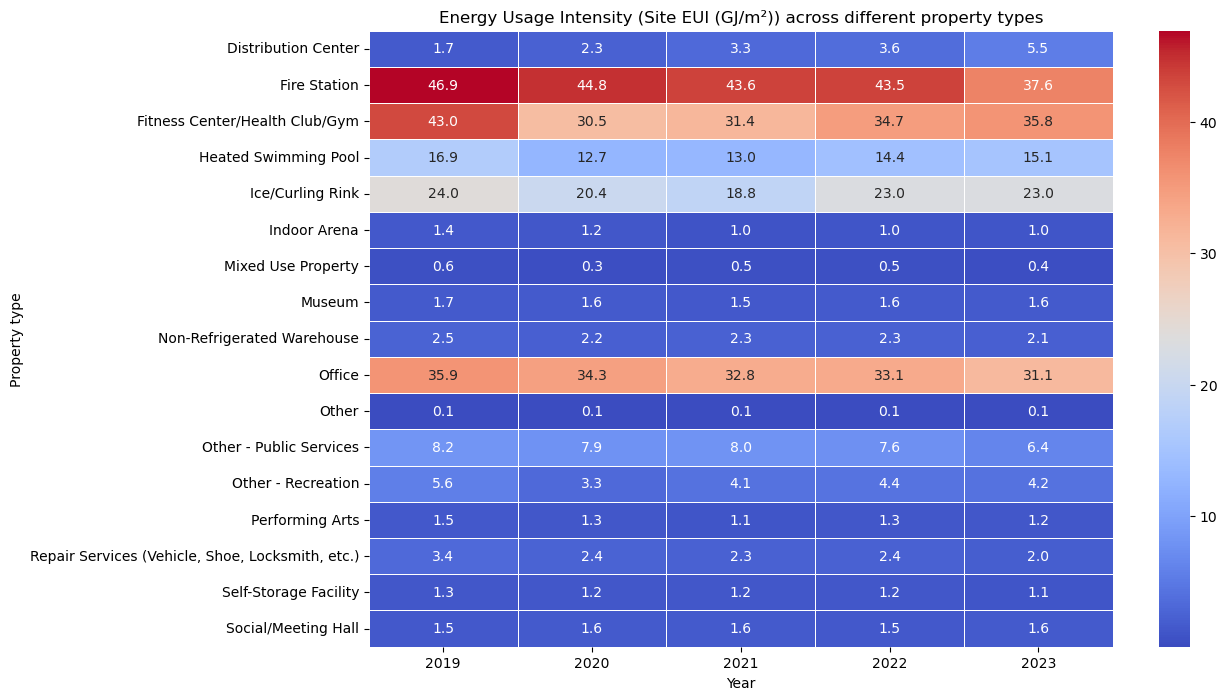

In [29]:
plt.figure(figsize = (12,8))
sns.heatmap(heatmap_pivot , annot=True , fmt='.1f' , cmap = 'coolwarm', linewidths=0.5)
plt.title('Energy Usage Intensity (Site EUI (GJ/m²)) across different property types')
plt.xlabel('Year')
plt.ylabel('Property type')
plt.show()

## Part 4: Further Analysis

#### 4.1 Correlation Analysis

**Compute and visualize the correlation matrix between energy consumption, emissions, and building size.**

In [30]:
df['Property GFA - Self-Reported (m²)'] = df['Property GFA - Self-Reported (m²)'].astype(str).str.replace(',', '').astype('float')

columns_of_interest = ['Site EUI (GJ/m²)', 'Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']
df_corr = df[columns_of_interest].corr()

display(df_corr)

,Site EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (m²)
Site EUI (GJ/m²),1.000000,0.269227,-0.012733
Total GHG Emissions (Metric Tons CO2e),0.269227,1.000000,0.478433
Property GFA - Self-Reported (m²),-0.012733,0.478433,1.000000


**Identify any strong correlations and explain their implications.**

According to the correlation table, there is a weak correlation (0.269227) between the site energy use intensity and total greenhouse gas emission. The correlation between the property GFA and total greenhouse gas emission indicate that there is a mediacore correlation between these two (0.478433). the correlation value of -0.012733 indicates that there is no correlation between the property GFA and site EUI

#### 4.2 Hypothesis Testing

**Conduct a t-test comparing the average Energy Star Score between two different property types (e.g., Offices vs. Residential buildings).**

In [37]:
from scipy import stats
group1 = df[df['Primary Property Type - Self Selected'] == 'Fire Station']["ENERGY STAR Score"]
group2 = df[df['Primary Property Type - Self Selected'] == 'Museum']["ENERGY STAR Score"]

t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


T-statistic: 1.0000, P-value: 0.3739


D:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Since p-value between these two building types is **0.3739** (Greater than 0.05), we can conclude that there is no significant difference between these two specific building types.

In [32]:
df.columns

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'Year Ending', 'Unique ID', 'Property Name_num', 'Address 1_num',
       'City_num', 'Postal Code_num', 'Province_num',
       'Primary Property Type - Self Selected_num',
       'Prope